## Semana 6- Acelera Dev

Notebook criado com base nas aulas do programa de aceleração de Data Science do Codenation.

Base de dados utilizada: [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)


In [1]:
#Importando os pacotes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

In [3]:
#Conhecendo as colunas do DataSet
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
#Verificando número de linhas e colunas do DataSet
df.shape

(1460, 81)

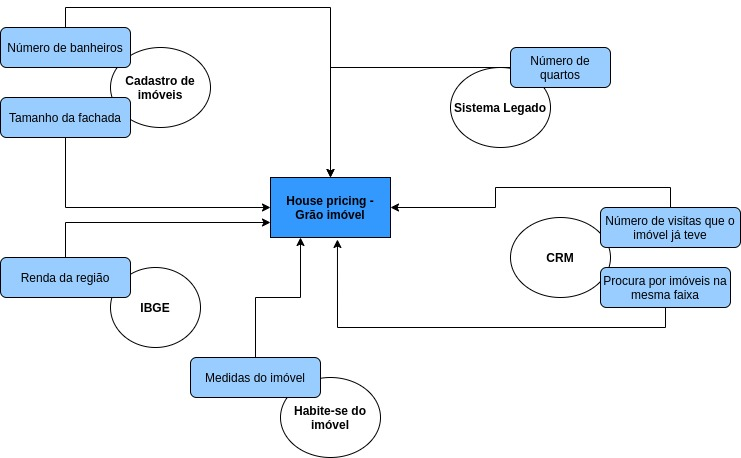

In [5]:
#Diagrama de mapas para a análise realizada
from IPython.display import Image
Image("Diagrama.jpg")

### Análise

Iremos realizar a seleção de features

### Seleção por completude

In [6]:
#Criando um dataframe auxliar para analisar a consistencia das variaveis
cons = pd.DataFrame({'colunas' : df.columns,
                    'tipo': df.dtypes,
                    'missing' : df.isna().sum(),
                    'size' : df.shape[0],
                    'unicos': df.nunique()})
cons['percentual'] = round(cons['missing'] / cons['size'],2)

In [7]:
#DataFrame criado
cons

,colunas,tipo,missing,size,unicos,percentual
Id,Id,int64,0,1460,1460,0.00
MSSubClass,MSSubClass,int64,0,1460,15,0.00
MSZoning,MSZoning,object,0,1460,5,0.00
LotFrontage,LotFrontage,float64,259,1460,110,0.18
LotArea,LotArea,int64,0,1460,1073,0.00
...,...,...,...,...,...,...
MoSold,MoSold,int64,0,1460,12,0.00
YrSold,YrSold,int64,0,1460,5,0.00
SaleType,SaleType,object,0,1460,9,0.00
SaleCondition,SaleCondition,object,0,1460,6,0.00


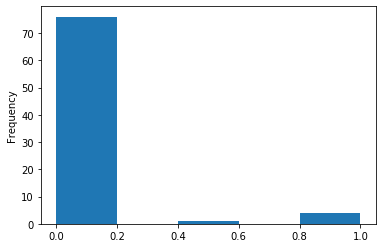

In [8]:
#Verificando de forma gráfica o percentual de dados faltantes
cons.percentual.plot.hist( bins = 5)

### Removendo colunas com dados faltantes

In [9]:
print('Contagem de colunas com ATÉ 20% de dados faltantes', cons[cons.percentual < 0.2].shape[0])
print('Contagem de colunas com 0% de dados faltantes',  cons[cons.percentual == 0].shape[0])

Contagem de colunas com ATÉ 20% de dados faltantes 76
Contagem de colunas com 0% de dados faltantes 63


In [10]:
#Verificando os tipos de variáveis
cons[cons.percentual == 0]['tipo'].value_counts()


int64     35
object    28
Name: tipo, dtype: int64

In [11]:
#Criando uma coluna com os dados completos
cons['completa'] = ['completa' if x == 0 else 'faltante' for x in cons['percentual']]

In [12]:
#Criando um dataframe com os dados considerados completos
mantem = list(cons[cons['completa'] == 'completa']['colunas'])
df = df[mantem]

In [13]:
#Trabalhando, para este caso com colunas numéricas e que contém todos os dados
colunas_numericas = list(cons[((cons['tipo'] != 'object') &
                              (cons['completa'] == 'completa'))]['colunas'])

### Exploração dos dados

Importante sempre documentar um projeto: observações de variáveis, entre outras.

Id


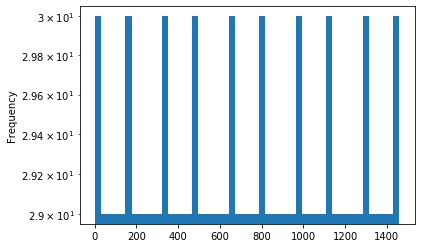

MSSubClass


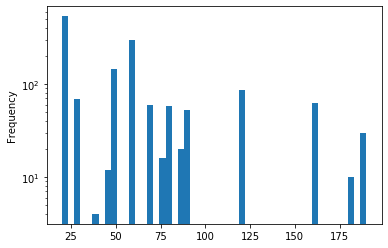

LotArea


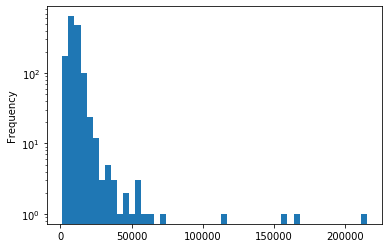

OverallQual


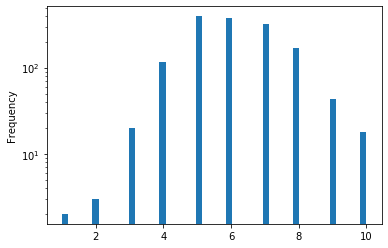

OverallCond


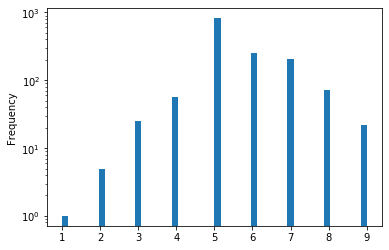

YearBuilt


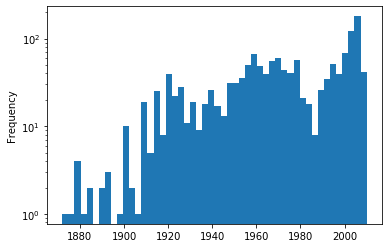

YearRemodAdd


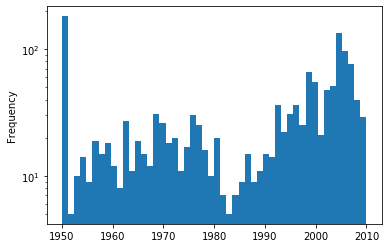

BsmtFinSF1


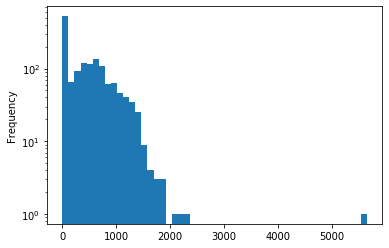

BsmtFinSF2


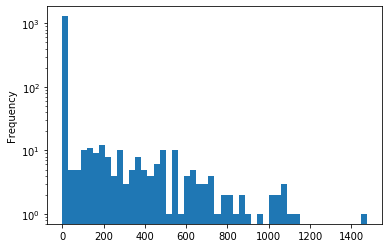

BsmtUnfSF


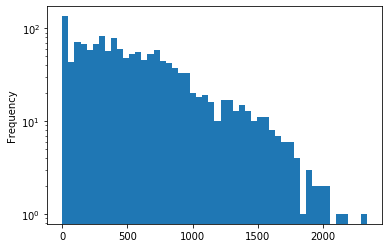

TotalBsmtSF


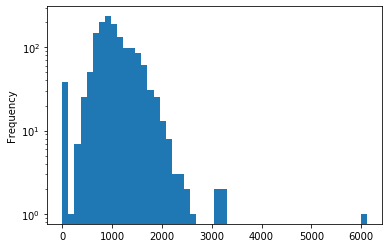

1stFlrSF


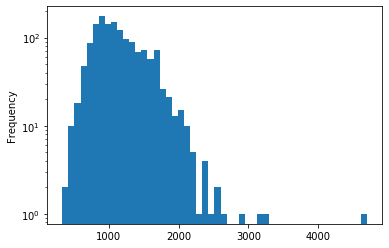

2ndFlrSF


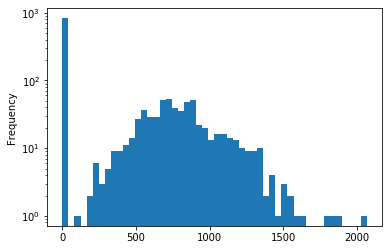

LowQualFinSF


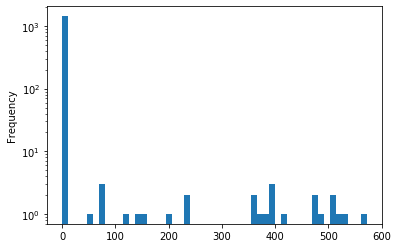

GrLivArea


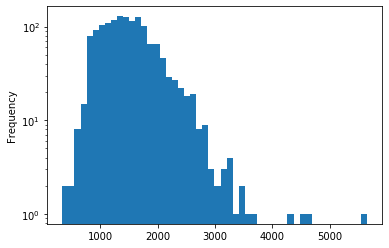

BsmtFullBath


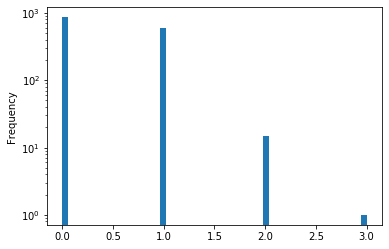

BsmtHalfBath


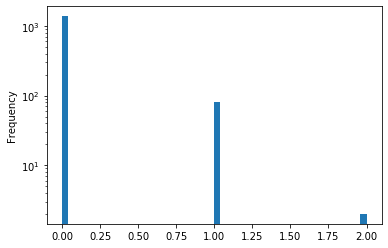

FullBath


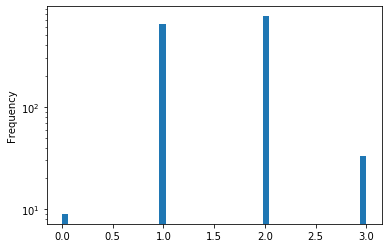

HalfBath


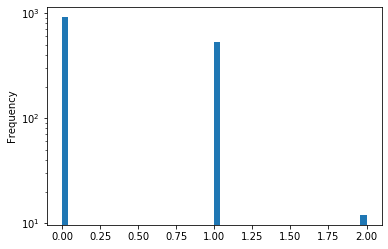

BedroomAbvGr


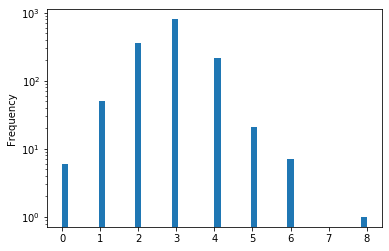

KitchenAbvGr


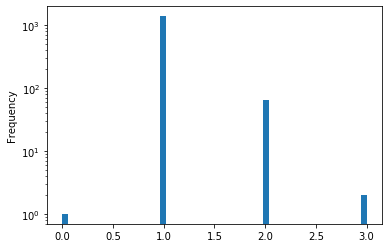

TotRmsAbvGrd


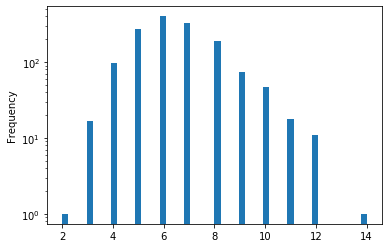

Fireplaces


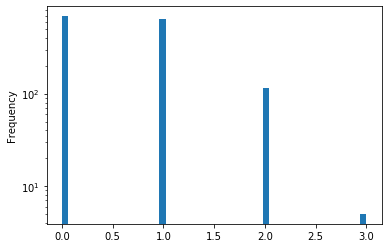

GarageCars


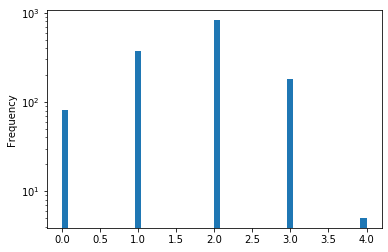

GarageArea


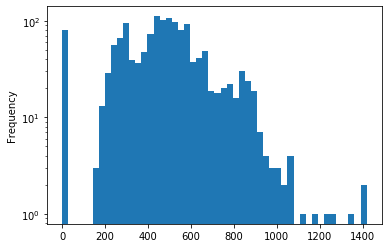

WoodDeckSF


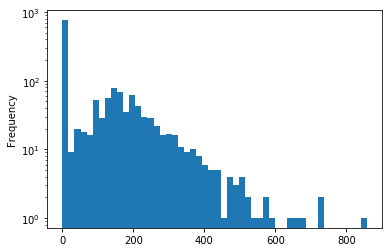

OpenPorchSF


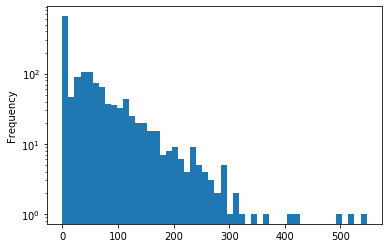

EnclosedPorch


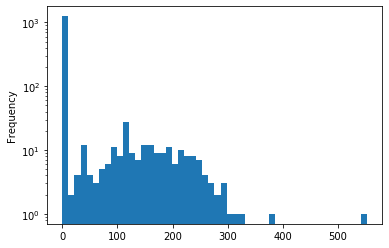

3SsnPorch


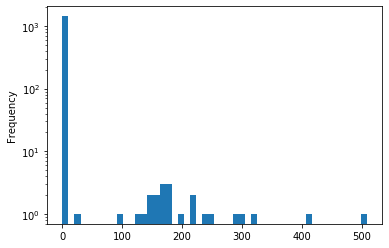

ScreenPorch


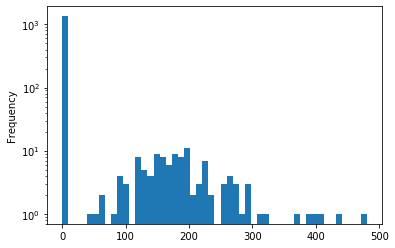

PoolArea


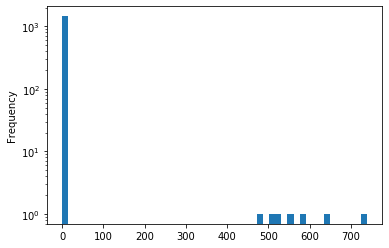

MiscVal


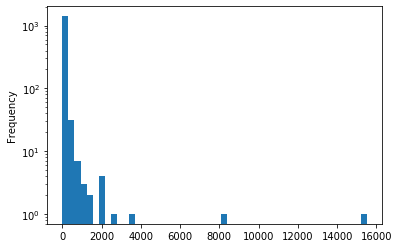

MoSold


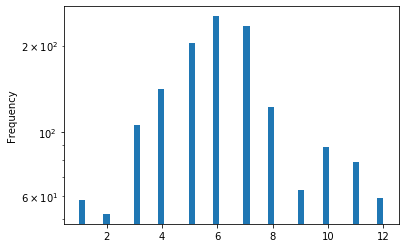

YrSold


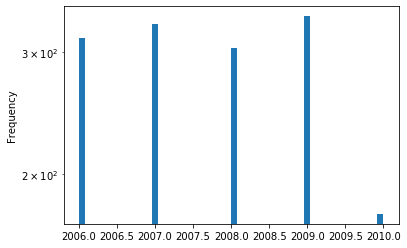

SalePrice


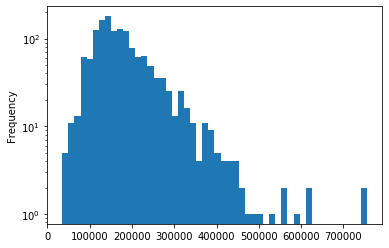

In [14]:
# Analise univariavel: plota gráfico de todas as variáveis numéricas em escala logarítimica
for coluna in colunas_numericas:
    print(coluna)
    df[coluna].plot.hist(bins = 50, log= True)
    plt.show()

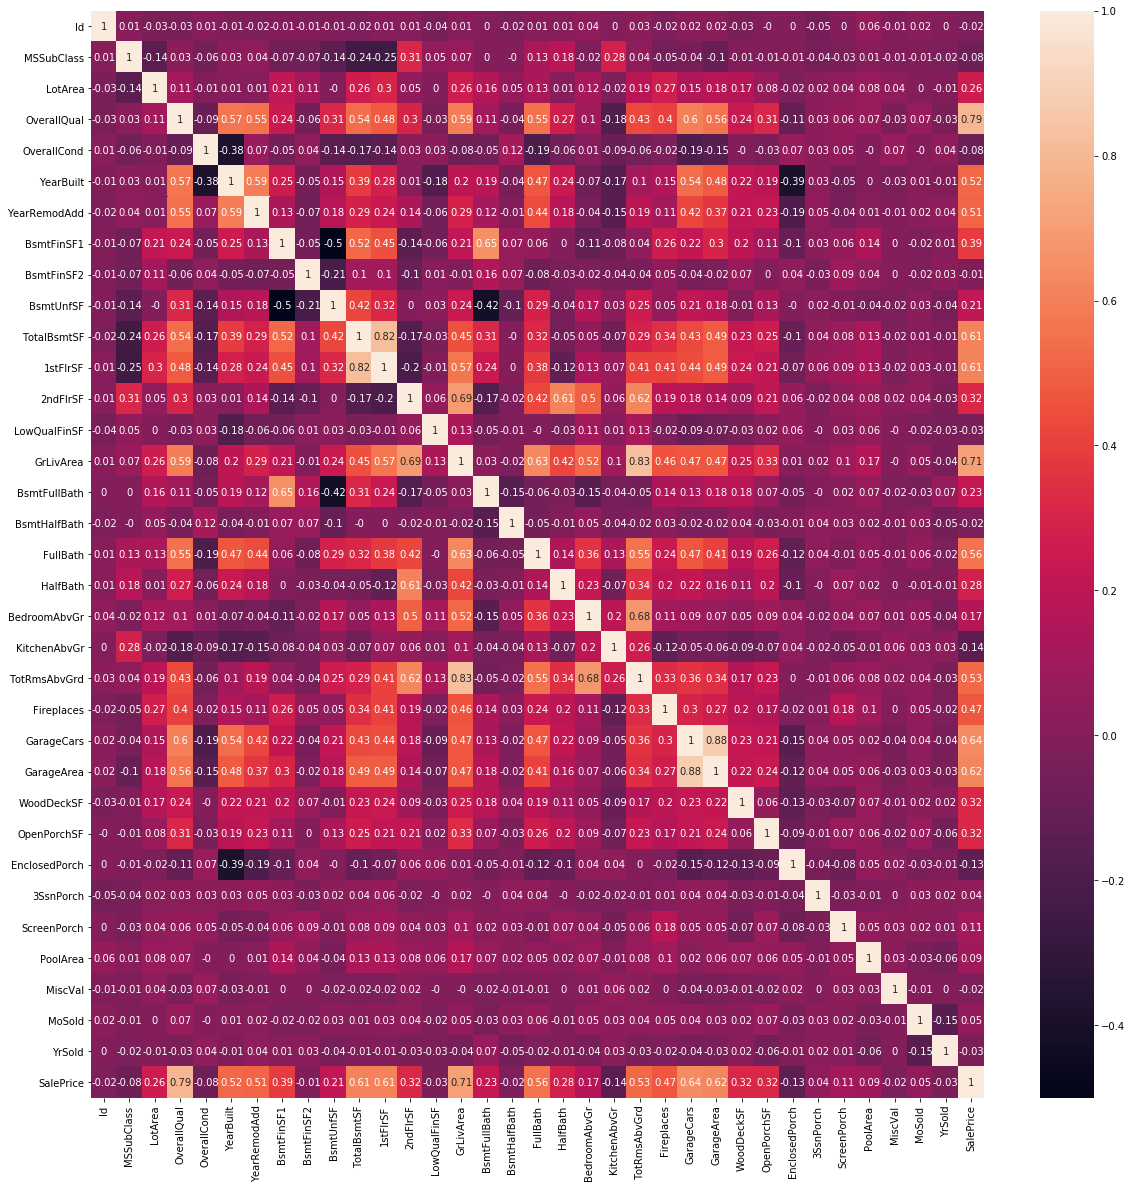

In [15]:
#Analisando a correlacao entre as variaveis númericas (auxilia no conhecimento dos dados)
plt.figure(figsize = (20,20))
sns.heatmap(df[colunas_numericas].corr().round(2), annot= True)

In [16]:
#Colunas correlacionadas com SalePrice
correlacionadas = ['GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual']

### Analisando as features com *yellowbrick*

Documentação [Yellowbrick](https://www.scikit-yb.org/en/latest/). A lib encapsula matplotib e sklearn e focado em visualização.


In [17]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [18]:
#Removendo a coluna ID
colunas_numericas.remove('Id')
df = df[colunas_numericas]

In [19]:
#Tratamento dos dados de teste com as informações de treino
y_train = df['SalePrice']
X_train = df.drop(columns = 'SalePrice')

/home/valeria.silva/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


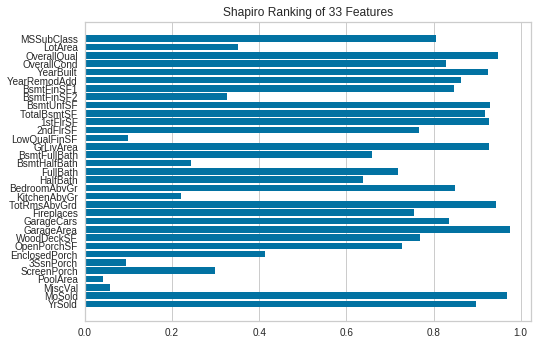

In [20]:
from yellowbrick.features import Rank1D

visualizer = Rank1D(algorithm='shapiro')

#Retorna um ranking das features: vejo se uma feature é importante ou não
visualizer.fit(X_train, y_train)           
visualizer.transform(X_train)        
visualizer.show()

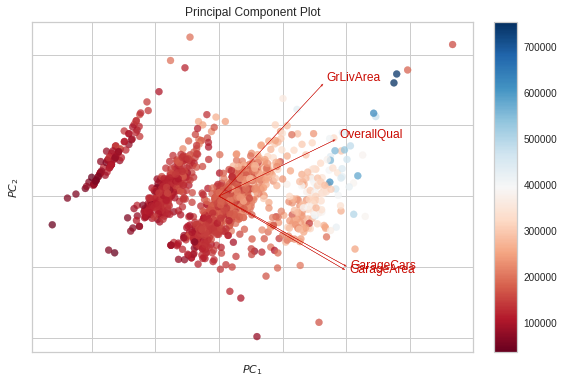

In [21]:
#Transformando as features em 2 dimensões
from yellowbrick.features import PCA

#Vermelho: casas mais baratas 
#Azul: casas mais caras
visualizer = PCA(scale=True, proj_features=True, projection=2)
visualizer.fit_transform(X_train[correlacionadas], y_train)
visualizer.show()

/home/valeria.silva/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


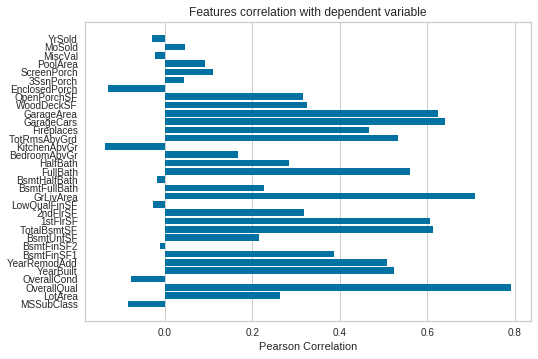

In [22]:
#Segue a correalação de Pearson
from yellowbrick.target import FeatureCorrelation

features = list(X_train.columns)

visualizer = FeatureCorrelation(labels=features)

visualizer.fit(X_train, y_train)        
visualizer.show()

### Treinando o Modelo

In [24]:
#Instalando Sklearn
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
reg = LinearRegression()

In [27]:
#Ajuste nos dados: aprendendo com os dados de treino
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
colunas_treinamento = X_train.columns

In [29]:
#Lendo os dados de teste
X_test = pd.read_csv('test.csv')
y_test = pd.read_csv('sample_submission.csv')

In [30]:
y_test = y_test['SalePrice']

### Atenção:

Os dados de traino não possuíam valores **nulos** já em produção posso ter valores nulos. O que faremos neste caso? Deve-se analisar cada tipo de situação para se tomar uma decisão sobre esses dados. 

In [31]:
#Dados nulos serão substitúidos pela média
X_test= X_test[colunas_treinamento].fillna(df[colunas_treinamento].mean())

In [32]:
#Fazendo as predições
y_pred = reg.predict(X_test)

In [33]:
#Modelo de regressão, se avalia pelo ERRO e não pela acurácia
from sklearn.metrics import mean_squared_error

In [35]:
erro_normal = mean_squared_error(y_pred=y_pred, y_true=y_test)

In [36]:
#Muitos erros = modelo ruim
erro_normal

4647194215.337046

**ERROS**

Em modelos de regressão se avaliam os erros. Quanto maior a quantidade de erros pior é o modelo. O que pode ser visto quando observa-se o plot dos dados. Se os dados estivessem perfeitamente correlacionados (O que também é suspeito) eu teria erros menores.

Esses erros são normais nesse caso, não analisamos os dados, trabalhamos com muitas features

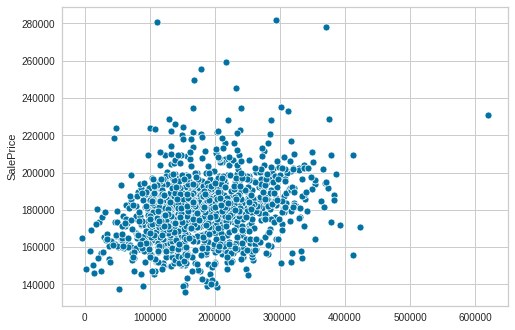

In [38]:
sns.scatterplot(y_pred, y_test)

## Aplicando a Feature Selection

In [39]:
#Elimina recursivamente as features
from sklearn.feature_selection import RFE

In [40]:
#Devo passar o estimador dos dados, nesse caso o reg 
rfe = RFE(reg)

In [41]:
#Fit nos dados. RFE aprende com os dados 
#RFE escolhe as features
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=None, step=1, verbose=0)

O RFE escolheu colunas com os coeficientes muito alto ou baixos e eliminou valores próximos a **zero**

In [42]:
#Criando um dataframe com as colunas de treino
#Mostra se a coluna foi escohidas ou não
pd.DataFrame({'coluna':X_train.columns,
              'bool': rfe.get_support(),
              'coeficientes': pd.Series(reg.coef_)})

,coluna,bool,coeficientes
0,MSSubClass,True,-162.672852
1,LotArea,False,0.396228
2,OverallQual,True,17905.067194
3,OverallCond,True,4418.794796
4,YearBuilt,True,346.653503
5,YearRemodAdd,True,137.073924
6,BsmtFinSF1,False,11.833598
7,BsmtFinSF2,False,-2.728260
8,BsmtUnfSF,False,0.787735
9,TotalBsmtSF,False,9.893072


**NUNCA FAÇA FIT NOS DADOS DE TESTE**

* Faço fit nos dados de treino e transformo nos dados de teste

In [43]:
#Transformando com rfe
X_train_importante = rfe.transform(X_train)
X_test_importante = rfe.transform(X_test)

In [44]:
#Faço um novo fit com dados filtrados
reg.fit(X_train_importante, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
#Predição do modelo
y_pred_imp = reg.predict(X_test_importante)

In [46]:
#Verificando os erros
erro_imp = mean_squared_error(y_pred=y_pred_imp, y_true=y_test)
erro_imp

4628516097.925263

**CONCLUSÂO**

Mesmo utilizando o REG os erros do modelo são muito altos.

/home/valeria.silva/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/valeria.silva/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


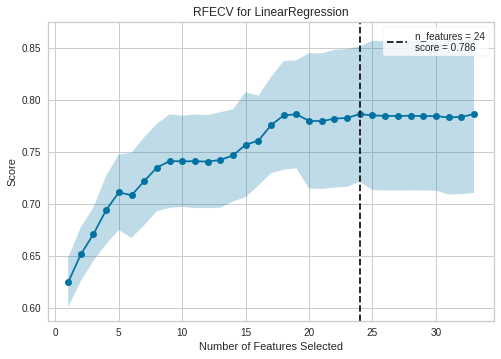

In [48]:
#Visualizando esses dados
from yellowbrick.model_selection import RFECV
visualizer = RFECV(reg)
visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           

###  Aplicando PCA

Um pouco sobre [PCA](http://www2.ic.uff.br/~aconci/PCA-ACP.pdf) ( *Principal Componet Analysis* ).

In [49]:
from sklearn.decomposition import PCA

In [50]:
#0.95 de variância explicada
pca = PCA(0.95)

In [51]:
#Fit nos dados de treino
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [52]:
pca.explained_variance_ratio_

array([0.98511677])

In [53]:
#Fazendo um transform nesses dados
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [54]:
#Regressão Linear
reg = LinearRegression()
reg.fit(X_train_pca, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
#Fazendo a predição com PCA
y_pred_pca = reg.predict(X_test_pca)

In [57]:
#Erro PCa
erro_pca = mean_squared_error(y_pred=y_pred_pca, y_true=y_test)

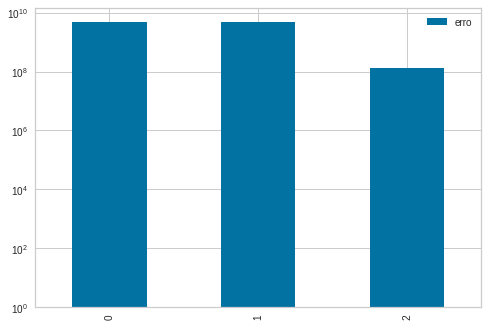

In [58]:
#Visualizando os erros dos modelos (Escala Logarítmica)
pd.DataFrame({'erro' : [erro_normal, erro_imp, erro_pca]}).plot(kind = 'bar', log = True)


Note que o modelo "aprendeu" melhor com o PCA, ou seja, seus erros foram menores.